# Phase 2

## Supervise ML Approach
- Since now we have labelled dataset for Overall, Agent and Customer Conversation. 

# Datapreprocessing
- Text Cleaning
- Text Vectorization technique
1. BOW
2. TF-IDF

## Handling Imbalanced Dataset

**Note** : Since count of Negative and neutral Sentiment are less as compare to positive hence need to handle this case.

1. SMOTE algorithm

## ML Model to use :-

- Logistic Regressor
- Multinomial NaiveBayes
- Support Vector Classifier
- Linear Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- XG Boost Classifier
- Cat Boost Classifier


## Hyperparameter Tuning Methods :-

1. GridSearchCV

##  Importing Required Libraries

In [1]:
########################################SENTIMENT#########################################
import numpy as np
import pandas as pd

import re
import string
import itertools                                                                 #plotting_confusion Matrix
import imblearn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import gensim
from textblob import TextBlob
from gensim.models import Word2Vec

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm                                                           #Progress bar
from bs4 import BeautifulSoup
from collections import Counter
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing ML Model Libraries

In [2]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Loading Data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_excel("Labelled_Transcribed_data_MajVoting.xlsx")
data.head()

,Transcribe_output,Keyphrases,AgentTranscription,CustomerTranscription,AgentIntent,CustomerIntent,Hold_Time,Duration,Before_Hold_Agent,Before_Hold_Customer,After_Hold_Agent,After_Hold_Customer,pos_tags_overall,pos_tags_agent,pos_tags_customer,Overall_SWN_Label,Agent_SWN_Label,Customer_SWN_Label,Overall_Vader_Label,Agent_Vader_Label,Customer_Vader_Label,Overall_TextBlob_Label,Agent_TextBlob_Label,Customer_TextBlob_Label,Final_Overall_Sentiment_Label,Final_Agent_Sentiment_Label,Final_Customer_Sentiment_Label
0,my name is how can I delight you today? Um Goo...,"['my name', 'today', 'Um Good morning', 'this ...",my name is how can I delight you today?. Yeah ...,Um Good morning actually when I was issued thi...,"['my name', 'today', 'the card holder', 'this ...","['Um Good', 'this card', 'uh', 'no uh', 'this ...",20.490,144.76,my name is how can I delight you today Yeah t...,Um Good morning actually when I was issued th...,NaN,NaN,"[('name', 'NN'), ('delight', 'VBD'), ('today',...","[('name', 'NN'), ('delight', 'VBD'), ('today',...","[('um', 'JJ'), ('good', 'JJ'), ('morning', 'NN...",Positive,Positive,Positive,Positive,Positive,Neutral,Positive,Positive,Positive,Positive,Positive,Positive
1,"Okay, could you Thank you? So uh couple of day...","['couple', 'days', 'the credit card', 'request...","could you Thank you? So. Okay,. One second. Ok...","Okay,. uh couple of days ago I have requested ...","['One second', 'the rest', 'the annual members...","['couple', 'days', 'the credit card', 'request...",100.410,238.70,could you Thank you So Okay One second Okay s...,Okay uh couple of days ago I have requested f...,NaN,NaN,"[('could', 'MD'), ('thank', 'VB'), ('couple', ...","[('could', 'MD'), ('thank', 'VB'), ('one', 'CD...","[('couple', 'NN'), ('day', 'NN'), ('ago', 'IN'...",Positive,Positive,Negative,Positive,Positive,Neutral,Positive,Positive,Positive,Positive,Positive,Negative
2,good evening. Thank you for choosing our bank....,"['good evening', 'our bank', 'My name', 'today...",evening. Thank you for choosing our bank. My n...,good. today? Uh Card 67. Okay. Yeah. Yeah well...,"['evening', 'our bank', 'My name', 'maxima car...","['today', 'Uh Card 67', 'October', '80', '10 u...",843.620,1141.13,evening Thank you for choosing our bank My na...,good today,maxima card Okay October October 600% residen...,Uh Card 67 Okay Yeah Yeah well Okay Okay Octo...,"[('good', 'JJ'), ('evening', 'NN'), ('thank', ...","[('evening', 'VBG'), ('thank', 'NN'), ('choosi...","[('good', 'JJ'), ('today', 'NN'), ('card', 'VB...",Positive,Neutral,Positive,Positive,Positive,Positive,Neutral,Neutral,Positive,Positive,Neutral,Positive
3,very good evening. Thank you for choosing our ...,"['very good evening', 'our bank', 'My name', '...",very good evening. Thank you for choosing our ...,"Uh actually 27,000. So uh before the statement...","['very good evening', 'our bank', 'My name', '...","['the statement', 'No I', 'the conversation', ...",277.175,739.28,very good evening Thank you for choosing our ...,"Uh actually 27,000 So uh before the statement...",NaN,NaN,"[('good', 'JJ'), ('evening', 'NN'), ('thank', ...","[('good', 'JJ'), ('evening', 'NN'), ('thank', ...","[('actually', 'RB'), ('statement', 'NN'), ('to...",Positive,Positive,Negative,Positive,Positive,Positive,Neutral,Positive,Neutral,Positive,Positive,Negative
4,Good evening. Thank you for choosing my name i...,"['my name', 'today', 'my card', 'my card', 'th...",Good evening. Thank you for choosing my name i...,my card That's. I want to cancel my card.. I d...,"['my name', 'today', 'the reason', 'the card',...","['my card', 'my card', 'my card', 'Uh', 'any w...",63.970,284.41,Good evening Thank you for choosing my name i...,my card That's I want to cancel my card I don...,NaN,NaN,"[('good', 'JJ'), ('evening', 'NN'), ('thank', ...","[('good', 'JJ'), ('evening', 'NN'), ('thank', ...","[('card', 'NN'), ('want', 'VBP'), ('cancel', '...",Positive,Positive,Neutral,Positive,Positive,Negative,Positive,Positive,Positiv

In [5]:
data.columns

Index(['Transcribe_output', 'Keyphrases', 'AgentTranscription',
       'CustomerTranscription', 'AgentIntent', 'CustomerIntent', 'Hold_Time',
       'Duration', 'Before_Hold_Agent', 'Before_Hold_Customer',
       'After_Hold_Agent', 'After_Hold_Customer', 'pos_tags_overall',
       'pos_tags_agent', 'pos_tags_customer', 'Overall_SWN_Label',
       'Agent_SWN_Label', 'Customer_SWN_Label', 'Overall_Vader_Label',
       'Agent_Vader_Label', 'Customer_Vader_Label', 'Overall_TextBlob_Label',
       'Agent_TextBlob_Label', 'Customer_TextBlob_Label',
       'Final_Overall_Sentiment_Label', 'Final_Agent_Sentiment_Label',
       'Final_Customer_Sentiment_Label'],
      dtype='object')

# Data Preprocessing

### Function for Text cleaning

In [6]:
def data_cleaner(data):
    clean_data = []
    lemmatizer = WordNetLemmatizer()
    stopword = set(stopwords.words('english'))
    custom_stopwords = ["okay", "uh"]
    
    for sentence in tqdm(data):
        # Step 1: Clean HTML tags, remove content within square brackets, remove characters except letters
        cleantext = re.sub('\[[^]]*\]', ' ', BeautifulSoup(sentence, "lxml").text)
        cleantext = re.sub('[^a-zA-Z]', ' ', cleantext)

        # Step 2: Remove punctuation
        cleantext = re.sub(r'[^\w\s]', '', cleantext)

        # Step 3: Convert to lowercase, Tokenize the text and remove stopwords and custom stopwords
        tokens = word_tokenize(cleantext.lower())
        tokens_cleaned = [token for token in tokens if token not in stopword and token not in custom_stopwords and len(token) > 1]

        # Step 4: Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_cleaned]

        # Step 5: Remove any leading or trailing whitespace
        cleantext = ' '.join(lemmatized_tokens).strip()
        
        clean_data.append(cleantext)
    
    return clean_data

# Checking frequency of Label data
- Count unique label count for each 'Agent_IN_Sentiment', 'Cust_IN_Sentiment', Overall_Sentiment

In [7]:
data['Final_Overall_Sentiment_Label'].value_counts()

Positive    719
Negative     62
Neutral      31
Name: Final_Overall_Sentiment_Label, dtype: int64

In [8]:
data['Final_Agent_Sentiment_Label'].value_counts()

Positive    614
Negative    155
Neutral      43
Name: Final_Agent_Sentiment_Label, dtype: int64

In [9]:
data['Final_Customer_Sentiment_Label'].value_counts()

Positive    470
Negative    270
Neutral      72
Name: Final_Customer_Sentiment_Label, dtype: int64

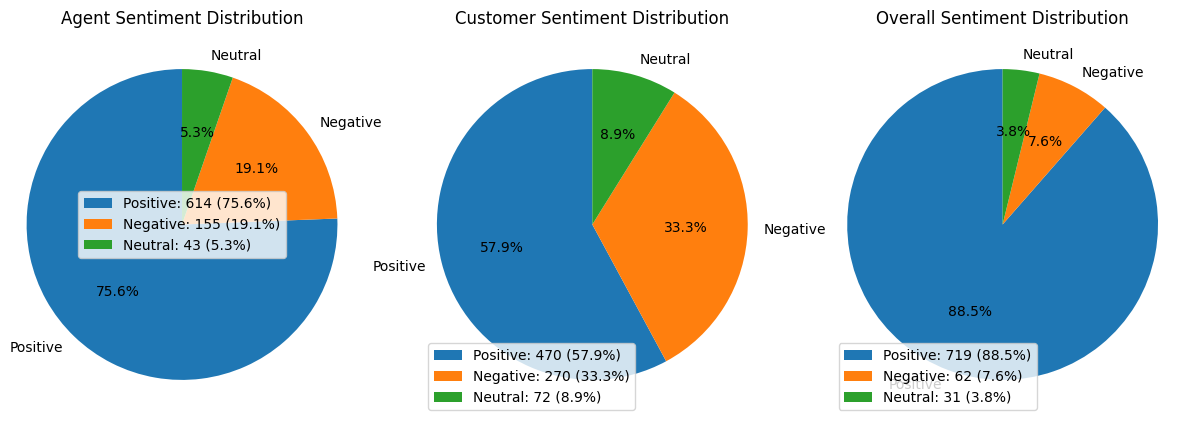

In [10]:
# Get the value counts of each sentiment category
agent_sentiment_counts = data['Final_Agent_Sentiment_Label'].value_counts()
customer_sentiment_counts = data['Final_Customer_Sentiment_Label'].value_counts()
overall_sentiment_counts = data['Final_Overall_Sentiment_Label'].value_counts()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie chart for Agent Sentiment
patches, _, _ = axes[0].pie(agent_sentiment_counts, labels=agent_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Agent Sentiment Distribution')

# Add value labels for Agent Sentiment
total_agent = agent_sentiment_counts.sum()
labels_agent = [f'{label}: {count} ({count / total_agent * 100:.1f}%)' for label, count in agent_sentiment_counts.items()]
axes[0].legend(patches, labels_agent, loc='best')

# Plot pie chart for Customer Sentiment
patches, _, _ = axes[1].pie(customer_sentiment_counts, labels=customer_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Customer Sentiment Distribution')

# Add value labels for Customer Sentiment
total_customer = customer_sentiment_counts.sum()
labels_customer = [f'{label}: {count} ({count / total_customer * 100:.1f}%)' for label, count in customer_sentiment_counts.items()]
axes[1].legend(patches, labels_customer, loc='best')

# Plot pie chart for Overall Sentiment
patches, _, _ = axes[2].pie(overall_sentiment_counts, labels=overall_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Overall Sentiment Distribution')

# Add value labels for Overall Sentiment
total_overall = overall_sentiment_counts.sum()
labels_overall = [f'{label}: {count} ({count / total_overall * 100:.1f}%)' for label, count in overall_sentiment_counts.items()]
axes[2].legend(patches, labels_overall, loc='best')

# Set the aspect ratio to be equal to ensure circular pie charts
for ax in axes:
    ax.axis('equal')

# Display the plot
plt.show()

# Part-1 : Overall_Sentiment_Classification

In [11]:
pd.set_option('max_colwidth', None)                          #To see full data of the columns with the max width

In [12]:
data.columns

Index(['Transcribe_output', 'Keyphrases', 'AgentTranscription',
       'CustomerTranscription', 'AgentIntent', 'CustomerIntent', 'Hold_Time',
       'Duration', 'Before_Hold_Agent', 'Before_Hold_Customer',
       'After_Hold_Agent', 'After_Hold_Customer', 'pos_tags_overall',
       'pos_tags_agent', 'pos_tags_customer', 'Overall_SWN_Label',
       'Agent_SWN_Label', 'Customer_SWN_Label', 'Overall_Vader_Label',
       'Agent_Vader_Label', 'Customer_Vader_Label', 'Overall_TextBlob_Label',
       'Agent_TextBlob_Label', 'Customer_TextBlob_Label',
       'Final_Overall_Sentiment_Label', 'Final_Agent_Sentiment_Label',
       'Final_Customer_Sentiment_Label'],
      dtype='object')

In [13]:
df = data[['Transcribe_output','Final_Overall_Sentiment_Label']]

In [14]:
df['Final_Overall_Sentiment_Label'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

# Text Cleaning

In [15]:
df['Cleaned_Text'] = data_cleaner(df['Transcribe_output'])

100%|███████████████████████████████████████████████████████████████████████████████| 812/812 [00:04<00:00, 167.52it/s]


In [16]:
df.head(3)

,Transcribe_output,Final_Overall_Sentiment_Label,Cleaned_Text
0,"my name is how can I delight you today? Um Good morning actually when I was issued this card so I was told that uh uh no uh will be, it will be but again in this month I have received a message that imposed, Yeah the card holder of this card. Okay, let me check your statement. Yes. Charges are included in this month. Okay. Now would you like to raise the request for? Alrighty. Thank you so much. Could you please send me your mother name? Uh 14,700 one. Okay, thanks for the verification so I will request for reversal this amount will be not refundable amount triple nine. It's only credit on your credit card. Okay, so are you okay with that now? Okay ma'am. Thank you. And firstly you have to uh pay this statement. Refundable amount will be adjusted in your next month statement. You have to pay the bill and the payment next month? Yes sir, definitely. And uh for a minute. Yeah, yes sir, I can number, it will be taken, it will be credit on your credit. Okay. Welcome. Is there anything else that I can assist you with? Thank you. Thank you so much. Okay thank you for calling us requested. You have a nice day. Okay.",Positive,name delight today um good morning actually issued card told month received message imposed yeah card holder card let check statement yes charge included month would like raise request alrighty thank much could please send mother name one thanks verification request reversal amount refundable amount triple nine credit credit card thank firstly pay statement refundable amount adjusted next month statement pay bill payment next month yes sir definitely minute yeah yes sir number taken credit credit welcome anything else assist thank thank much thank calling u requested nice day
1,"Okay, could you Thank you? So uh couple of days ago I have requested for the credit card. Okay, request Uh I got a lot of, I wanted to know the reason Sure. One second. Okay, so if you want to the rest of the annual membership take very quick please. Okay, Yeah, I think no worries. So he goes uh some issues uh sub sub category selected the requested decline, but I have taken the request for verification purposes? Yes. Sorry. Okay, tell me your name, party, I know that I just yeah. Sorry uh tell me, repeat again. Uh so which month annual membership fee will be charged? December. December. Okay, very quick Turnaround time, did we take of I remember confirmation will be refunded if you want then I will be mentioned on there, please mention that. Okay now if you want that then I will be Mhm. request Okay. policies is there anything else for now? This will be okay. Thank you so much. Thank you so much. Have a wonderful day. Okay.",Positive,could thank couple day ago requested credit card request got lot wanted know reason sure one second want rest annual membership take quick please yeah think worry go issue sub sub category selected requested decline taken request verification purpose yes sorry tell name party know yeah sorry tell repeat month annual membership fee charged december december quick turnaround time take remember confirmation refunded want mentioned please mention want mhm request policy anything else thank much thank much wonderful day
2,"good evening. Thank you for choosing our bank. My name is, how may I delight you today? Uh Card 67 maxima card Okay. Yeah. Yeah well Okay. Okay. Okay. October. October okay. October 600%. resident 80 double 10 uh 001 eight double zero double 01. resident verification. Mhm. double Okay 80 double 114 last time. resident yeah. bank I do request number registered mobile number dot com K Y C. Dot dot R D S. rbl bank dot com. bank dot com. Welcome to our banks. Please enter the things which we have sent on your registered number followed by the last night. Congratulations. Yeah I would like to receive dot dot dot dot bank dot com finish. Yeah the sorry sorry many address address A D. H. D. For bangalore. A for S for haryana, P. For U. 

### WordClouds

#### We will be building three types of wordclouds:

- WordCloud of Neutral conversation
- WordCloud of Positive conversation
- WordCloud of Negative conversation

In [17]:
import wordcloud
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [18]:
def analyze_sentiment(df, text_column, sentiment_column, skip_words=[]):
    # Filter data by sentiment
    positive_data = df[df[sentiment_column] == 'Positive']
    negative_data = df[df[sentiment_column] == 'Negative']
    neutral_data = df[df[sentiment_column] == 'Neutral']

    # Combine text data
    positive_text = ' '.join(positive_data[text_column])
    negative_text = ' '.join(negative_data[text_column])
    neutral_text = ' '.join(neutral_data[text_column])

    # Define stopwords
    stopwords_list = set(stopwords.words('english') + skip_words)

    # Tokenize and count word frequency, excluding stopwords
    positive_tokens = [token for token in word_tokenize(positive_text) if token.lower() not in stopwords_list]
    negative_tokens = [token for token in word_tokenize(negative_text) if token.lower() not in stopwords_list]
    neutral_tokens = [token for token in word_tokenize(neutral_text) if token.lower() not in stopwords_list]

    # Word Frequency
    positive_word_frequency = Counter(positive_tokens)
    negative_word_frequency = Counter(negative_tokens)
    neutral_word_frequency = Counter(neutral_tokens)

    # Plot word frequency
    def plot_word_frequency(word_frequency, title):
        words, counts = zip(*word_frequency.most_common(20))
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts)
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()

    plot_word_frequency(positive_word_frequency, 'Positive Sentiment Word Frequency')
    plot_word_frequency(negative_word_frequency, 'Negative Sentiment Word Frequency')
    plot_word_frequency(neutral_word_frequency, 'Neutral Sentiment Word Frequency')

    # Generate word clouds
    def generate_word_cloud(data, title):
        wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10,
                              stopwords=stopwords_list).generate(data)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.title(title)
        plt.show()

    generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
    generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')
    generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud')

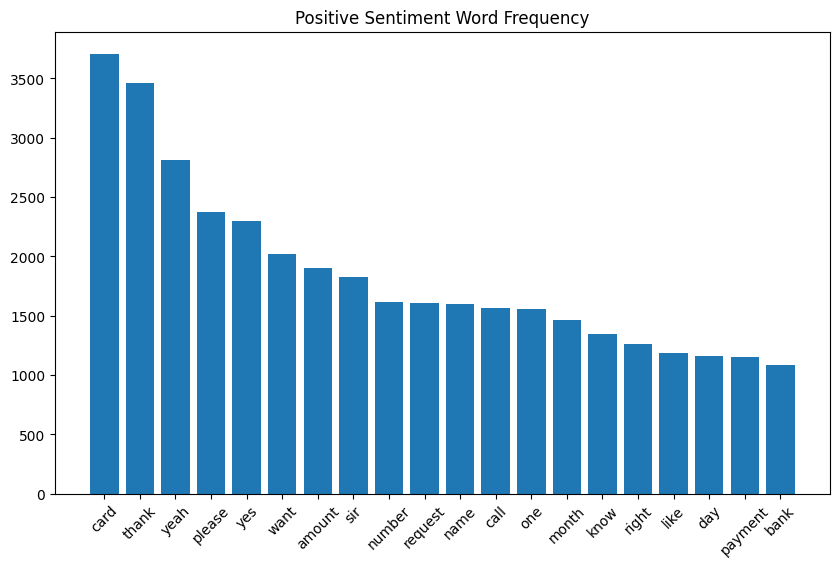

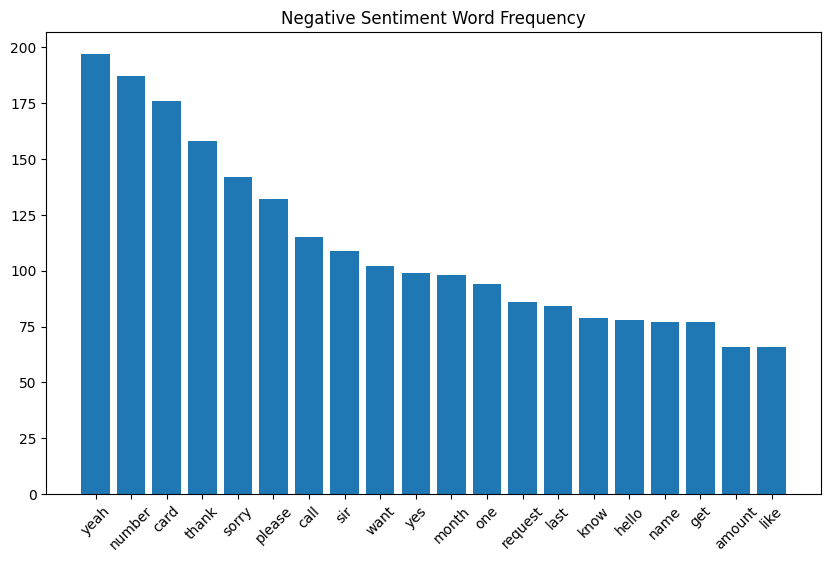

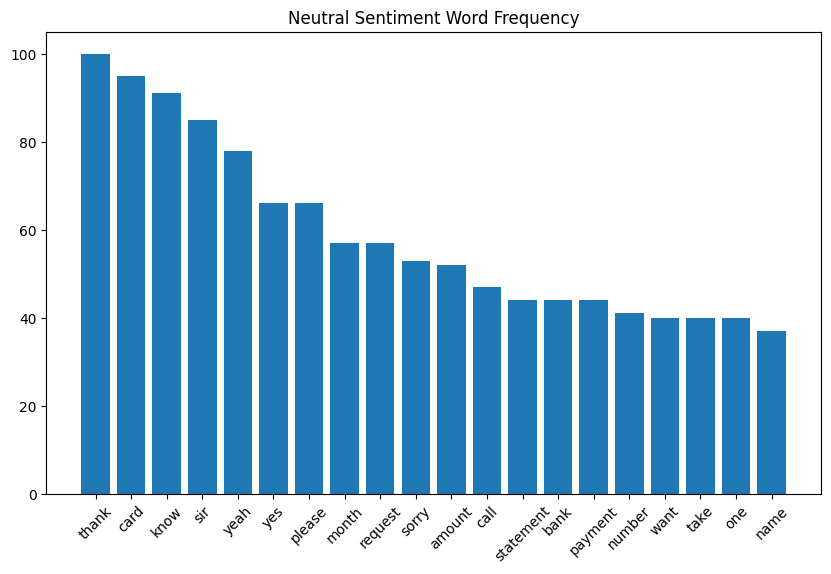

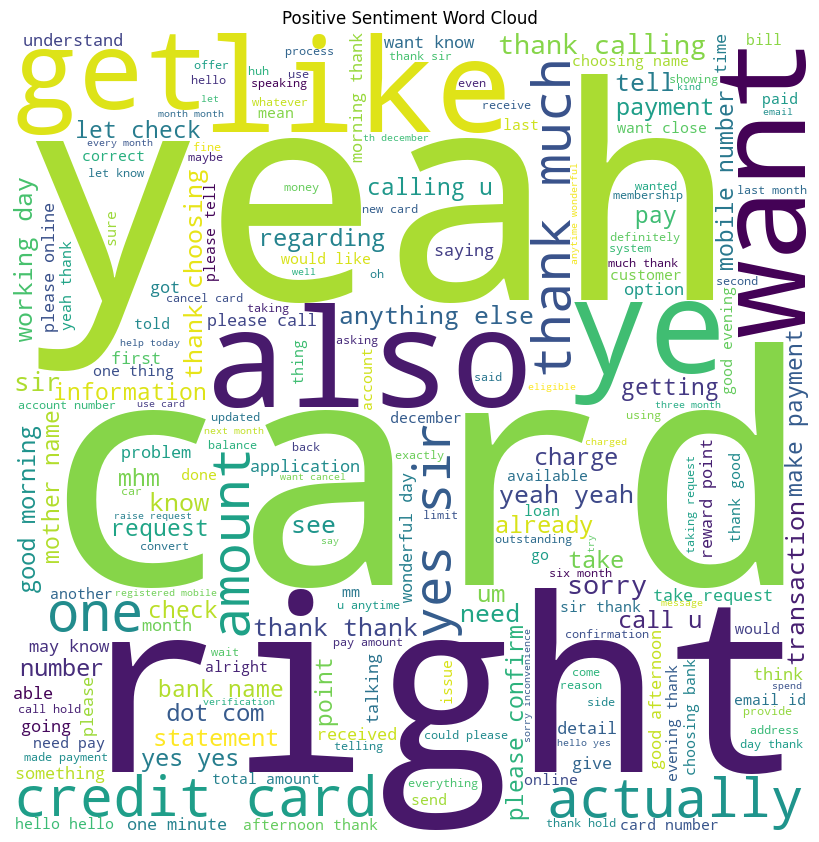

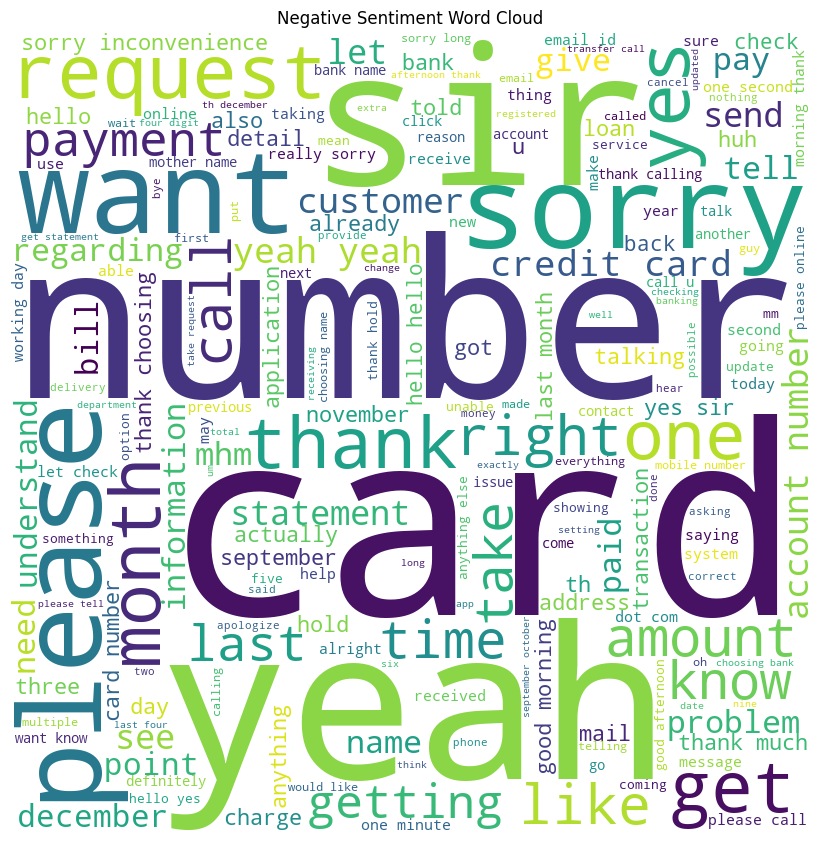

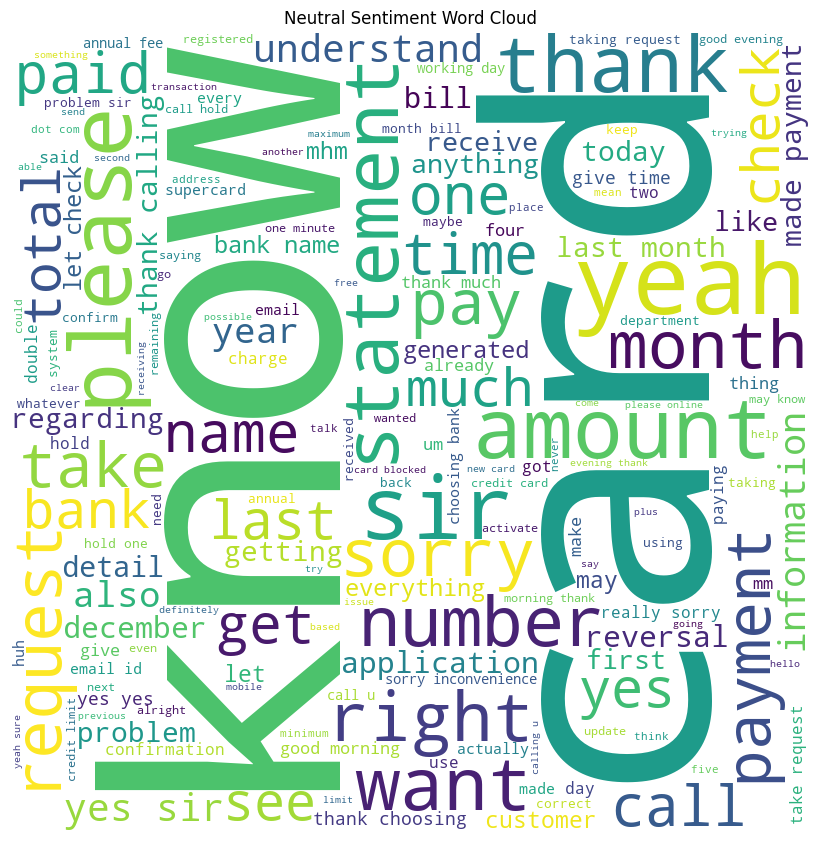

In [19]:
skip_words = ['okay', 'uh']
analyze_sentiment(df, 'Cleaned_Text', 'Final_Overall_Sentiment_Label', skip_words)

# Feature Selection

In [20]:
# Split the data into input features and target labels.
X = df['Cleaned_Text']
y = df['Final_Overall_Sentiment_Label']

## Label Encoding
- since most machine learning algorithms require numeric inputs for the target variable.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Encode target variable
y_encoded = le.fit_transform(y)

In [22]:
# Get the mapping of encoded labels to original labels
label_mapping = dict(zip(range(len(le.classes_)), le.classes_))

# Print the label mapping
for encoded_label, original_label in label_mapping.items():
    print(f"Encoded label {encoded_label} corresponds to original label '{original_label}'")

Encoded label 0 corresponds to original label 'Negative'
Encoded label 1 corresponds to original label 'Neutral'
Encoded label 2 corresponds to original label 'Positive'


## Train Test Split

- stratify parameter is set to y, which means that the class labels are used to ensure that the training and testing sets have the same proportion of each class.

In [23]:
# Split the cleaned data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Create a new dataframe to store the cleaned data and the original data
train_data = pd.DataFrame({'Cleaned_TrainedText': X_train, 'Final_Overall_Sentiment_Label': y_train})

test_data = pd.DataFrame({'Cleaned_TestText': X_test, 'Final_Overall_Sentiment_Label': y_test})

# View the first few rows of the new dataframe
display(train_data.head(2))
display(test_data.head(2))

,Cleaned_TrainedText,Final_Overall_Sentiment_Label
289,good evening thank choosing bank name know yeah want know production month statement online let check yeah via right yeah asking usually would around something like online talking recommend thank showing yes sir see actually point usually around think early last month statement statement something like annual fee annual fee already applied enjoy today morning asking also next statement like actually triple nine already submitted mhm already reversal fee initiated need customer already already already initiated reason today morning already spend rupee think nearly last year receive information spend pay amount rupee management amount right yes sir take request also mentioned refund right yeah also refunded next next statement unable give charity got take confirmation right charity yeah reversed reversal check request amount also mentioned maybe got also thanks yeah anything else assist apart nothing thank welcome call receive link like service please provide available feedback purpose please share valuable feedback information bank dot com thank welcome thank calling u please call u wonderful day thank,2
18,good morning thank choosing bank name delete today good morning good morning receiving notification every every frequently would say maybe four five hour every day basically card declined temporary blocked making transaction change believe yes status check side apologize seeing message send detail firstly may know talking cardholder sir yeah name thank verification card permanently closed google play google play transaction declined due block maybe said card auto debit google play amount charged every day saying making transaction first transaction happen remove card google play application receive message happen card permanently closed receiving message remove card google play application receive message want unblock process apologize card able unblock permanently closed apply new card website triple dot bank dot com yes sir yeah yeah one thing money money card see right also kind showing called balance everything app also asking activate card also know remember lost closed also apply issue process apply new permanently got make sense got good like got information thank much thank anything else apart help sir thank thank calling u bank please call u anytime wonderful day sir thank,2


,Cleaned_TestText,Final_Overall_Sentiment_Label
624,good afternoon thank choosing bank name like today hi last statement last statement see membership fee added got message membership government next billing make transaction know believe membership see membership already regarding already check application transition one minute regarding statement need make payment per statement tell wanted already check complete point let calculate plus fine fine problem anything else would like single transmission also single transition high amount single transition convert single transition according single transition eligible let tell moment mhm right yes many one would would like know wanted see three month month three month go one next point transition three month monthly amount rupee monthly email regarding interest three month yeah interest three month interest per month including interest paid included interest monthly also included interest monthly interest going reflect case interest regarding going interest yes yes also oh one double nine plus time charge statement oh god yeah like house single recording information also visit website call receive feedback regarding behavior call share experience available system sir thank thank calling u bank please call anytime wonderful day yes,2
499,good afternoon thank calling name missed yeah hi received message connected card order yeah let check card blocked due security reason transaction done transaction someone else try contact contact table time block card directly know transaction transaction done th december transaction please tell mother take request let tell tell thank verification online taking request location card taken request location request id number get registered mobile number within three working day removed anything else single transaction well want convert amount convert want convert visit website please provide thank contacting u,2


# Text Vectorization Technique

1. BOW
2. TF-IDF

### Bag of words

In [24]:
# Create a CountVectorizer object
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
count_test = count_vectorizer.transform(X_test)

In [25]:
# Get the feature names from the CountVectorizer object
feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame from the count_train matrix
cv_df = pd.DataFrame(count_train.toarray(), columns=feature_names)

# display the first few rows of the DataFrame
display(cv_df.head())

ability  able  abrasion  abroad  absolute  absolutely  accept  acceptable  \
0        0     0         0       0         0           0       0           0   
1        0     1         0       0         0           0       0           0   
2        0     0         0       0         0           0       0           0   
3        0     0         0       0         0           0       0           0   
4        0     0         0       0         0           0       0           0   

   accepted  accepting  access  accident  accord  according  accordingly  \
0         0          0       0         0       0          0            0   
1         0          0       0         0       0          0            0   
2         0          0       0         0       0          0            0   
3         0          0       0         0       0          0            0   
4         0          0       0         0       0          0            0   

   account  accountant  accumulated  accurate  achieve  acknowledgement  \
0        0           0            0         0        0                0   
1        0           0            0         0        0                0   
2        0           0            0         0        0                0   
3        0           0            0         0        0                0   
4        0           0            0         0        0                0   

   activate  activated  activating  activation  active  activity  actual  \
0         0          0           0           0       0         0       0   
1         1          0           0           0       0         0       0   
2         0          0           0           0       0         0       0   
3         0          0           0           0       0         0       0   
4         0          0           0           0       0         0       0   

   actually  ad  adam  add  added  adding  addition  additional  address  \
0         2   0     0    0      0       0         0           0        0   
1         0   0     0    0      0       0         0           0        0   
2         0   0     0    0      0       0         0           0        0   
3         4   0     0    0      0       0         0           0        0   
4         0   0     0    0      0       0         0           0        0   

   addressed  adjust  adjusted  adjustment  admin  adult  advance  advancing  \
0          0       0         0           0      0      0        0          0   
1          0       0         0           0      0      0        0          0   
2          0       0         0           0      0      0        0          0   
3          0       0         0           0      0      0        0          0   
4          0       0         0           0      0      0        0          0   

   advantage  advice  advisor  affect  affected  afford  afternoon  agency  \
0          0       0        0       0         0       0          0       0   
1          0       0        0       0         0       0          0       0   
2          0       0        0       0         0       0          0       0   
3          0       0        0       0         0       0          1       0   
4          0       0        0       0         0       0          1       0   

   agenda  agent  ago  agree  agreed  agreement  ah  ahead  air  airline  \
0       0      0    0      0       0          0   0      0    0        0   
1       0      0    0      0       0          0   0      0    0        0   
2       0      0    0      0       0          0   0      0    0        0   
3       0      0    0      0       0          0   0      0    0        0   
4       0      0    0      0       0          0   0      0    0        0   

   airport  alert  alexa  alicia  alison  allergy  allow  allowed  allowing  \
0        0      0      0       0       0        0      0        0         0   
1        0      0      0       0       0        0      0        0         0   
2        0      0      0       0       0        0      0

In [26]:
# Sum the columns and sort them in descending order
word_counts = cv_df.sum().sort_values(ascending=False)

# Get the top 10 words
top_10_words = word_counts[:10]

# Display the top 10 words
print(top_10_words)

card       2857
thank      2668
yeah       2278
yes        1816
want       1503
sir        1439
number     1370
request    1265
month      1163
know       1080
dtype: int64


### TF-IDF

In [27]:
# Instantiate TfidfVectorizer with stop_words set to 'english' and max_df set to 0.8
# stop_words removes common English words such as 'the', 'and', 'a', etc.
# max_df is used to ignore terms that have a document frequency strictly higher than the given threshold
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
tfidf_test = tfidf_vectorizer.transform(X_test)

In [28]:
# Get the feature names from the TfidfVectorizer object
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the tfidf_train matrix
tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=feature_names_tfidf)

# the first few rows of the DataFrame
display(tfidf_df.head())

ability      able  abrasion  abroad  absolute  absolutely  accept  \
0      0.0  0.000000       0.0     0.0       0.0         0.0     0.0   
1      0.0  0.036771       0.0     0.0       0.0         0.0     0.0   
2      0.0  0.000000       0.0     0.0       0.0         0.0     0.0   
3      0.0  0.000000       0.0     0.0       0.0         0.0     0.0   
4      0.0  0.000000       0.0     0.0       0.0         0.0     0.0   

   acceptable  accepted  accepting  access  accident  accord  according  \
0         0.0       0.0        0.0     0.0       0.0     0.0        0.0   
1         0.0       0.0        0.0     0.0       0.0     0.0        0.0   
2         0.0       0.0        0.0     0.0       0.0     0.0        0.0   
3         0.0       0.0        0.0     0.0       0.0     0.0        0.0   
4         0.0       0.0        0.0     0.0       0.0     0.0        0.0   

   accordingly  account  accountant  accumulated  accurate  achieve  \
0          0.0      0.0         0.0          0.0       0.0      0.0   
1          0.0      0.0         0.0          0.0       0.0      0.0   
2          0.0      0.0         0.0          0.0       0.0      0.0   
3          0.0      0.0         0.0          0.0       0.0      0.0   
4          0.0      0.0         0.0          0.0       0.0      0.0   

   acknowledgement  activate  activated  activating  activation  active  \
0              0.0  0.000000        0.0         0.0         0.0     0.0   
1              0.0  0.077457        0.0         0.0         0.0     0.0   
2              0.0  0.000000        0.0         0.0         0.0     0.0   
3              0.0  0.000000        0.0         0.0         0.0     0.0   
4              0.0  0.000000        0.0         0.0         0.0     0.0   

   activity  actual  actually   ad  adam  add  added  adding  addition  \
0       0.0     0.0  0.087246  0.0   0.0  0.0    0.0     0.0       0.0   
1       0.0     0.0  0.000000  0.0   0.0  0.0    0.0     0.0       0.0   
2       0.0     0.0  0.000000  0.0   0.0  0.0    0.0     0.0       0.0   
3       0.0     0.0  0.137928  0.0   0.0  0.0    0.0     0.0       0.0   
4       0.0     0.0  0.000000  0.0   0.0  0.0    0.0     0.0       0.0   

   additional  address  addressed  adjust  adjusted  adjustment  admin  adult  \
0         0.0      0.0        0.0     0.0       0.0         0.0    0.0    0.0   
1         0.0      0.0        0.0     0.0       0.0         0.0    0.0    0.0   
2         0.0      0.0        0.0     0.0       0.0         0.0    0.0    0.0   
3         0.0      0.0        0.0     0.0       0.0         0.0    0.0    0.0   
4         0.0      0.0        0.0     0.0       0.0         0.0    0.0    0.0   

   advance  advancing  advantage  advice  advisor  affect  affected  afford  \
0      0.0        0.0        0.0     0.0      0.0     0.0       0.0     0.0   
1      0.0        0.0        0.0     0.0      0.0     0.0       0.0     0.0   
2      0.0        0.0        0.0     0.0      0.0     0.0       0.0     0.0   
3      0.0        0.0        0.0     0.0      0.0     0.0       0.0     0.0   
4      0.0        0.0        0.0     0.0      0.0     0.0       0.0     0.0   

   afternoon  agency  agenda  agent  ago  agree  agreed  agreement   ah  \
0   0.000000     0.0     0.0    0.0  0.0    0.0     0.0        0.0  0.0   
1   0.000000     0.0     0.0    0.0  0.0    0.0     0.0        0.0  0.0   
2   0.000000     0.0     0.0    0.0  0.0    0.0     0.0        0.0  0.0   
3   0.040433     0.0     0.0    0.0  0.0    0.0     0.0        0.0  0.0   
4   0.136731     0.0     0.0    0.0  0.0    0.0     0.0        0.0  0.0   

   ahead  air  airline  airport  alert  alexa  alicia  alison  allergy  allow  \
0    0.0  0.0      0.0      0.0    0.0    0.0     0.0     0.0      0.0    0.0   
1    0.0  0.0      0.0      0.0    0.0    0.0     0.0     0.0      0.0    0.0   
2    0.0  0.0      0.0      0.0    0.0    0.0     0.0     0.0      0.0    0.0   
3    0.0  0.0      0.0      0.0    0.0    0.0     0.0     0

In [29]:
# Sum the TF-IDF scores for each word across all documents
tfidf_sum = tfidf_train.sum(axis=0)

# Create a DataFrame with the feature names and their corresponding sums
tfidf_df = pd.DataFrame({'feature_names': feature_names_tfidf, 'tfidf_sum': tfidf_sum.tolist()[0]})

# Sort the DataFrame by the tfidf_sum in descending order and display the top 10 words
top_words = tfidf_df.sort_values(by='tfidf_sum', ascending=False).head(10)
print(top_words)

     feature_names  tfidf_sum
324           card  61.745749
2510          yeah  51.855388
2514           yes  42.002196
2128           sir  39.837604
2453          want  35.728275
1544        number  35.691625
1942       request  34.256826
1623       payment  31.344527
1469         month  31.334686
1036         hello  26.697905


# Handling Imbalanced Dataset

# 1. SMOTE

### SMOTE with BOW

In [30]:
# SMOTE with CountVectorizer
smote_cv = SMOTE(random_state=42, k_neighbors=5)
X_train_cv_balanced, y_train_cv_balanced = smote_cv.fit_resample(count_train, y_train)
print("CountVectorizer:")
print(sorted(Counter(y_train_cv_balanced).items()))

CountVectorizer:
[(0, 503), (1, 503), (2, 503)]


### SMOTE with TF-IDF

In [31]:
# SMOTE with TfidfVectorizer
smote_tfidf = SMOTE(random_state=42, k_neighbors=5)
X_train_tfidf_balanced, y_train_tfidf_balanced = smote_tfidf.fit_resample(tfidf_train, y_train)
print("TfidfVectorizer:")
print(sorted(Counter(y_train_tfidf_balanced).items()))

TfidfVectorizer:
[(0, 503), (1, 503), (2, 503)]


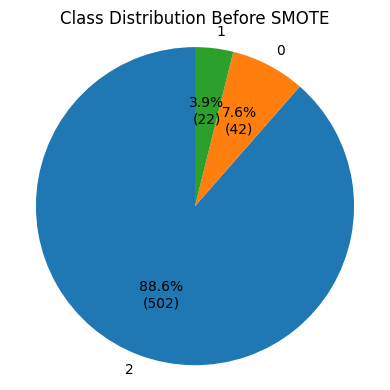

In [32]:
# Calculate the class distribution before SMOTE
class_counts_before = dict(Counter(y_train))

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(4, 4))

# Pie chart before SMOTE
values_before = list(class_counts_before.values())
labels_before = list(class_counts_before.keys())
ax.pie(values_before, labels=labels_before, autopct=lambda pct: f"{pct:.1f}%\n({int(pct * sum(values_before) / 100)})",
       startangle=90)
ax.set_title('Class Distribution Before SMOTE')

# Set the aspect ratio to be equal to ensure a circular pie chart
ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

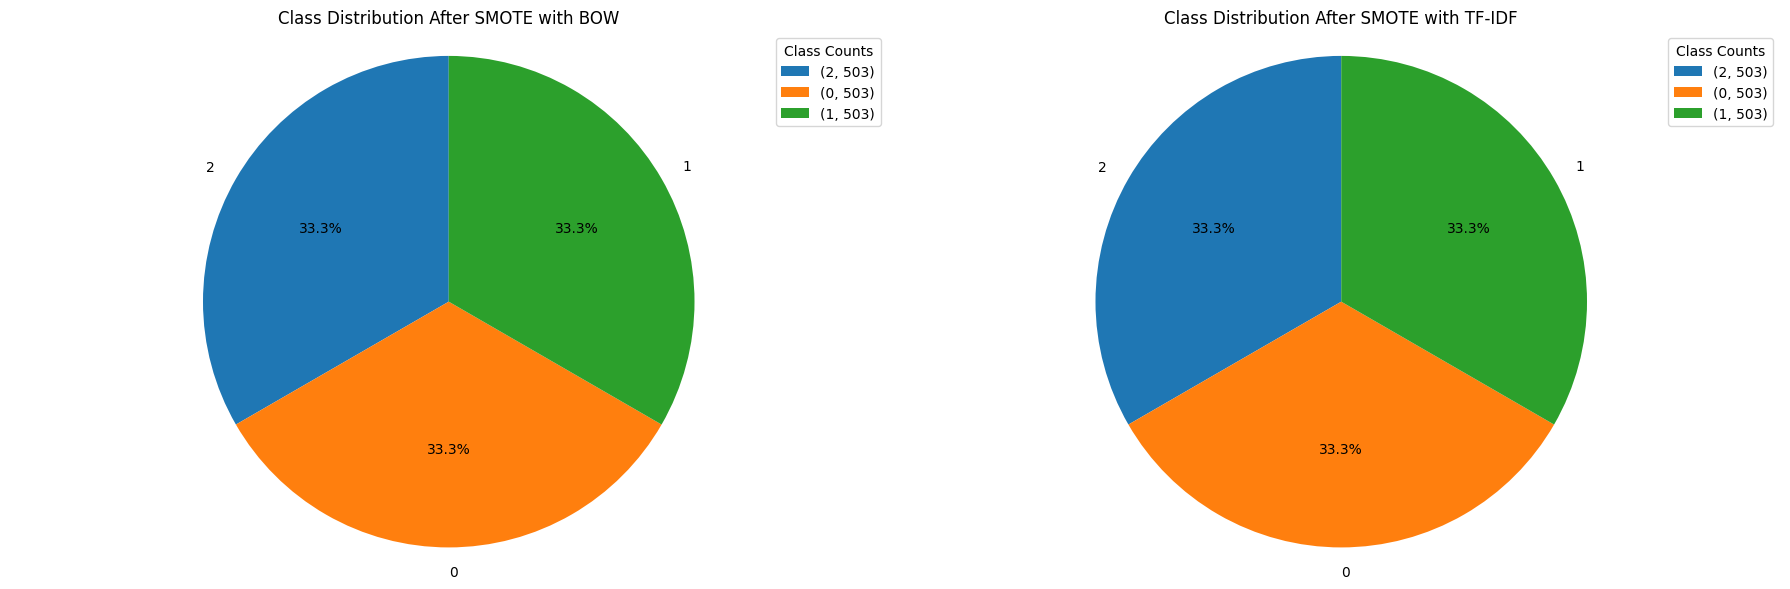

In [33]:
# Calculate the class distribution after SMOTE with BOW
class_counts_bow_after = dict(Counter(y_train_cv_balanced))

# Calculate the class distribution after SMOTE with TF-IDF
class_counts_tfidf_after = dict(Counter(y_train_tfidf_balanced))

# Plotting the pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart after SMOTE with BOW
patches, _, _ = axes[0].pie(class_counts_bow_after.values(), labels=class_counts_bow_after.keys(), startangle=90, autopct='%1.1f%%')
axes[0].set_title('Class Distribution After SMOTE with BOW')
axes[0].legend(patches, class_counts_bow_after.items(), loc='best', title='Class Counts')

# Pie chart after SMOTE with TF-IDF
patches, _, _ = axes[1].pie(class_counts_tfidf_after.values(), labels=class_counts_tfidf_after.keys(), startangle=90, autopct='%1.1f%%')
axes[1].set_title('Class Distribution After SMOTE with TF-IDF')
axes[1].legend(patches, class_counts_tfidf_after.items(), loc='best', title='Class Counts')


# Set the aspect ratio to be equal to ensure circular pie charts
for ax in axes:
    ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

# Machine Learning Models

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Set the figure size
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Add title and axis labels
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add annotations to the plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "green" if i == j else "red"
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color=color)

    # Add axis labels and show the plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## ML Models : SMOTE with BOW

### Models

In [35]:
# Instantiate and fit a logistic regression object
lr_bow = LogisticRegression(random_state=42)
lr_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the Naive Bayes model
nb_bow = MultinomialNB()
nb_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the Linear Support Vector Classifier model
svc_bow = SVC(random_state=42, probability=True)
svc_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the Linear Support Vector Classifier model
lin_svc_bow = SVC(kernel='linear', random_state=42,  probability=True)
lin_svc_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the Decision Tree Classifier model
dtc_bow = DecisionTreeClassifier(random_state=42)
dtc_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the Random Forest Classifier
rf_bow = RandomForestClassifier(random_state=42)
rf_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the XGBoost Classifier
xgb_bow = xgb.XGBClassifier(random_state=42)
xgb_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

# Instantiate and fit the CatBoost Classifier
cat_bow = CatBoostClassifier(random_state=42, verbose=0)
cat_bow.fit(X_train_cv_balanced, y_train_cv_balanced)

## Model Prediction and Evaluation

Logistic Regression (BOW) - Accuracy: 0.8811475409836066
Logistic Regression (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.33      0.33      0.33         9
           2       0.93      0.95      0.94       216

    accuracy                           0.88       244
   macro avg       0.59      0.55      0.57       244
weighted avg       0.87      0.88      0.88       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

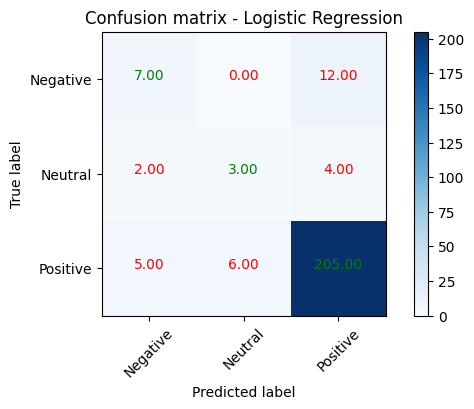

Multinomial Naive Bayes (BOW) - Accuracy: 0.8852459016393442
Multinomial Naive Bayes (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.17        19
           1       0.00      0.00      0.00         9
           2       0.90      0.99      0.94       216

    accuracy                           0.89       244
   macro avg       0.47      0.37      0.37       244
weighted avg       0.83      0.89      0.85       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

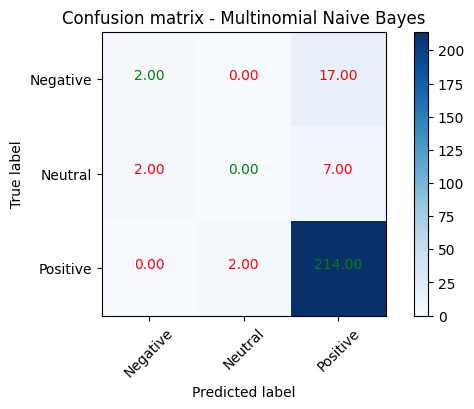

Decision Tree Classifier (BOW) - Accuracy: 0.7622950819672131
Decision Tree Classifier (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.21      0.16        19
           1       0.12      0.22      0.15         9
           2       0.92      0.83      0.88       216

    accuracy                           0.76       244
   macro avg       0.39      0.42      0.40       244
weighted avg       0.83      0.76      0.79       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

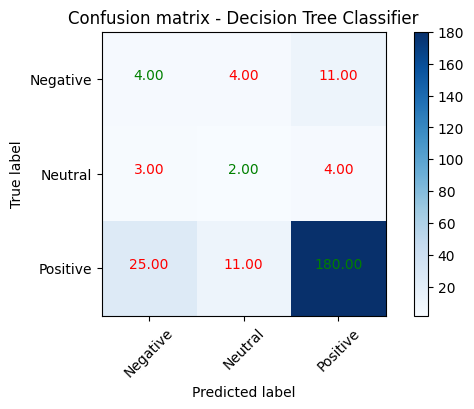

Support Vector Classifier (BOW) - Accuracy: 0.8524590163934426
Support Vector Classifier (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.21      0.22        19
           1       0.25      0.33      0.29         9
           2       0.93      0.93      0.93       216

    accuracy                           0.85       244
   macro avg       0.47      0.49      0.48       244
weighted avg       0.86      0.85      0.85       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

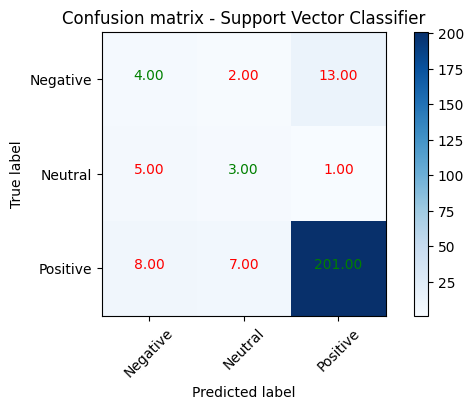

Linear SVC (BOW) - Accuracy: 0.8729508196721312
Linear SVC (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.42      0.43        19
           1       0.30      0.33      0.32         9
           2       0.94      0.94      0.94       216

    accuracy                           0.87       244
   macro avg       0.56      0.56      0.56       244
weighted avg       0.87      0.87      0.87       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

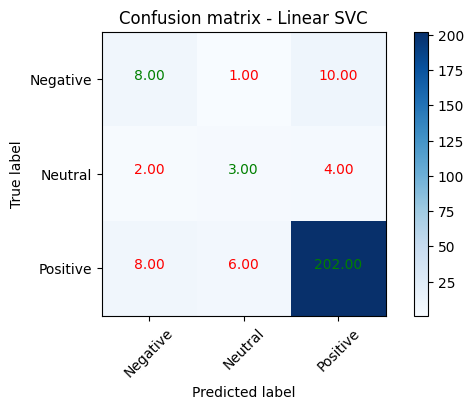

Random Forest Classifier (BOW) - Accuracy: 0.8975409836065574
Random Forest Classifier (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.33      0.11      0.17         9
           2       0.92      0.98      0.95       216

    accuracy                           0.90       244
   macro avg       0.60      0.47      0.51       244
weighted avg       0.87      0.90      0.88       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

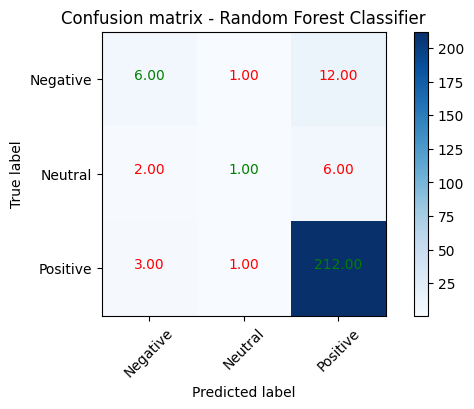

XG Boost (BOW) - Accuracy: 0.9016393442622951
XG Boost (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.26      0.37        19
           1       1.00      0.11      0.20         9
           2       0.91      0.99      0.95       216

    accuracy                           0.90       244
   macro avg       0.85      0.46      0.51       244
weighted avg       0.89      0.90      0.88       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

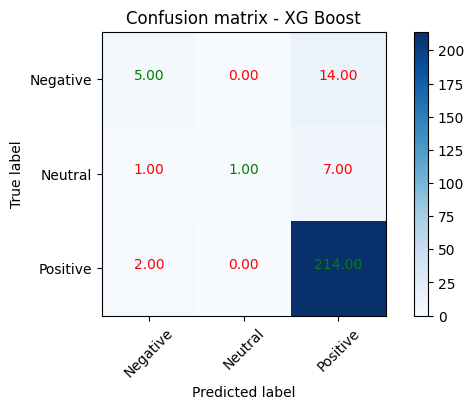

Cat Boost (BOW) - Accuracy: 0.8647540983606558
Cat Boost (BOW) - Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.21      0.27        19
           1       0.10      0.11      0.11         9
           2       0.92      0.95      0.94       216

    accuracy                           0.86       244
   macro avg       0.46      0.43      0.44       244
weighted avg       0.85      0.86      0.86       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

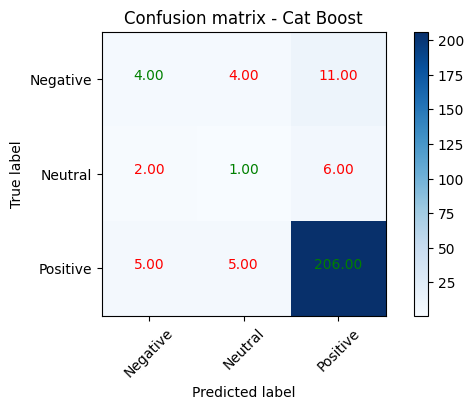

In [36]:
# List of models to evaluate
models = [('Logistic Regression', lr_bow), ('Multinomial Naive Bayes', nb_bow),
          ('Decision Tree Classifier', dtc_bow), ('Support Vector Classifier', svc_bow), 
          ('Linear SVC', lin_svc_bow), ('Random Forest Classifier', rf_bow), 
          ('XG Boost', xgb_bow), ('Cat Boost', cat_bow) ]

# Iterate through each model and evaluate its performance
for model_name, model in models:
    # Make predictions
    y_pred = model.predict(count_test)
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model_name, "(BOW) - Accuracy:", accuracy)
    print(model_name, "(BOW) - Classification Report:\n", report)
    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'],
                          title='Confusion matrix - ' + model_name)
    plt.show()

## Summary Table - Model with BOW

In [37]:
# Define the models
models = {
    'Logistic Regression': lr_bow,
    'Multinomial Naive Bayes': nb_bow,
    'Decision Tree Classifier': dtc_bow,
    'Support Vector Classifier': svc_bow,
    'Linear SVC': lin_svc_bow,
    'Random Forest Classifier' : rf_bow,
    'XG Boost Classifier' : xgb_bow,
    'Cat Boost': cat_bow
}

# Create a DataFrame to store the evaluation metrics
results_bow = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and store the results in the DataFrame
for model_name, model in models.items():
    y_pred = model.predict(count_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_bow.loc[model_name] = [accuracy, precision, recall, f1]

# Display the results

print("Summary Table : SMOTE with BOW")
display(results_bow)

Summary Table : SMOTE with BOW


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.881148,0.872385,0.881148,0.875881
Multinomial Naive Bayes,0.885246,0.834912,0.885246,0.848091
Decision Tree Classifier,0.762295,0.831223,0.762295,0.793287
Support Vector Classifier,0.852459,0.855145,0.852459,0.853525
Linear SVC,0.872951,0.873543,0.872951,0.873190
Random Forest Classifier,0.897541,0.870735,0.897541,0.878874
XG Boost Classifier,0.901639,0.891692,0.901639,0.876318
Cat Boost,0.864754,0.849765,0.864754,0.855448


## ML Models : SMOTE with TF-IDF

### Models

In [38]:
# Instantiate and fit the Logistic Regression model
lr_tfidf = LogisticRegression(random_state=42, max_iter=1000)
lr_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the Naive Bayes model
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the Support vector classifier model
svc_tfidf = SVC(random_state=42, probability=True)
svc_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the LinearSVC model
lin_svc_tfidf = SVC(kernel='linear',random_state=42,  probability=True)
lin_svc_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the Decision Tree Classifier model
dtc_tfidf = DecisionTreeClassifier(random_state=42)
dtc_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the Random Forest Classifier
rf_tfidf = RandomForestClassifier(random_state=42)
rf_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the XGBoost Classifier
xgb_tfidf = xgb.XGBClassifier(random_state=42)
xgb_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Instantiate and fit the CatBoost Classifier
cat_tfidf = CatBoostClassifier(random_state=42, verbose=0)
cat_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

### Model Prediction & Evaluation

Logistic Regression (TFIDF) - Accuracy: 0.8811475409836066
Logistic Regression (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.26      0.33        19
           1       0.14      0.11      0.12         9
           2       0.92      0.97      0.95       216

    accuracy                           0.88       244
   macro avg       0.51      0.45      0.47       244
weighted avg       0.86      0.88      0.87       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

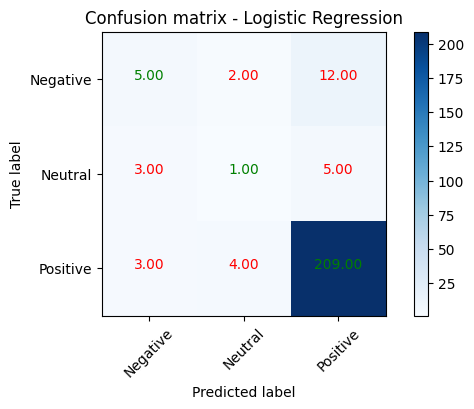

Multinomial Naive Bayes (TFIDF) - Accuracy: 0.8319672131147541
Multinomial Naive Bayes (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.21      0.21        19
           1       0.08      0.11      0.10         9
           2       0.93      0.92      0.92       216

    accuracy                           0.83       244
   macro avg       0.41      0.41      0.41       244
weighted avg       0.84      0.83      0.84       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

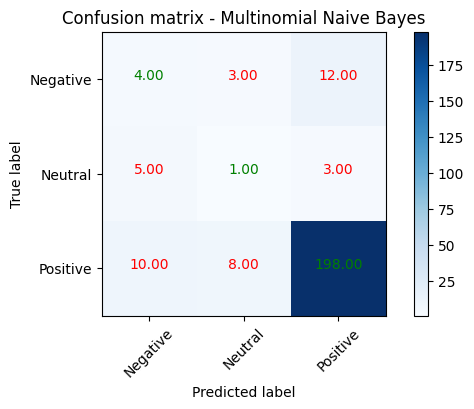

Decision Tree Classifier (TFIDF) - Accuracy: 0.7745901639344263
Decision Tree Classifier (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.32      0.26        19
           1       0.06      0.11      0.07         9
           2       0.92      0.84      0.88       216

    accuracy                           0.77       244
   macro avg       0.40      0.42      0.40       244
weighted avg       0.83      0.77      0.80       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

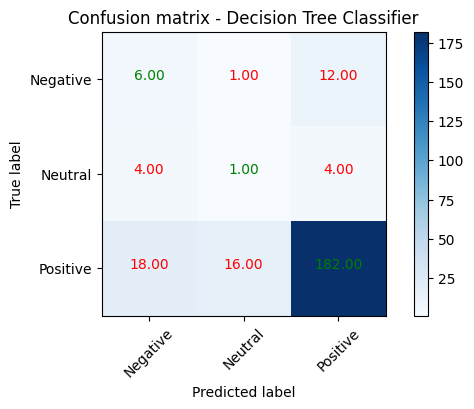

Support Vector Classifier (TFIDF) - Accuracy: 0.8852459016393442
Support Vector Classifier (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00         9
           2       0.89      1.00      0.94       216

    accuracy                           0.89       244
   macro avg       0.30      0.33      0.31       244
weighted avg       0.78      0.89      0.83       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

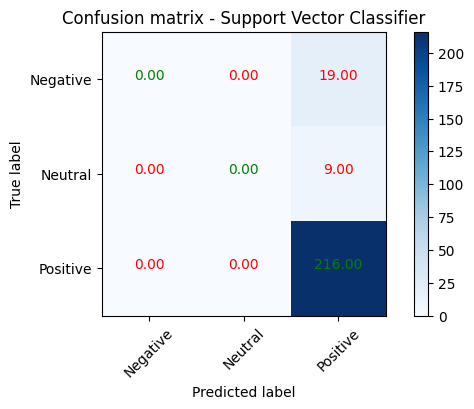

Linear SVC (TFIDF) - Accuracy: 0.8811475409836066
Linear SVC (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.21      0.28        19
           1       0.00      0.00      0.00         9
           2       0.91      0.98      0.94       216

    accuracy                           0.88       244
   macro avg       0.44      0.40      0.41       244
weighted avg       0.84      0.88      0.86       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

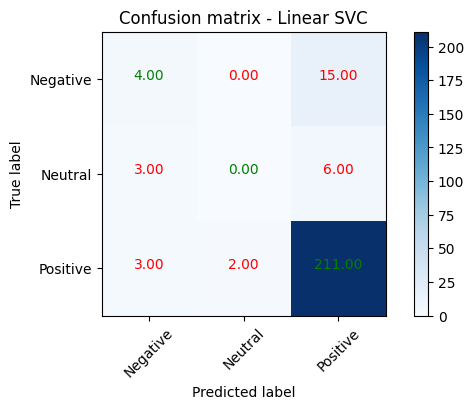

Random Forest Classifier (TFIDF) - Accuracy: 0.889344262295082
Random Forest Classifier (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.16      0.25        19
           1       0.00      0.00      0.00         9
           2       0.90      0.99      0.94       216

    accuracy                           0.89       244
   macro avg       0.50      0.38      0.40       244
weighted avg       0.84      0.89      0.85       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

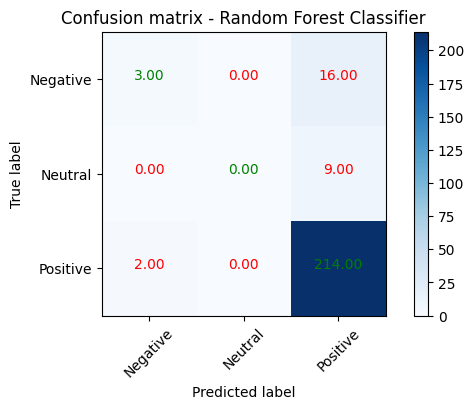

XG Boost Classifier (TFIDF) - Accuracy: 0.889344262295082
XG Boost Classifier (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.21      0.28        19
           1       1.00      0.11      0.20         9
           2       0.91      0.98      0.94       216

    accuracy                           0.89       244
   macro avg       0.77      0.43      0.47       244
weighted avg       0.87      0.89      0.86       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

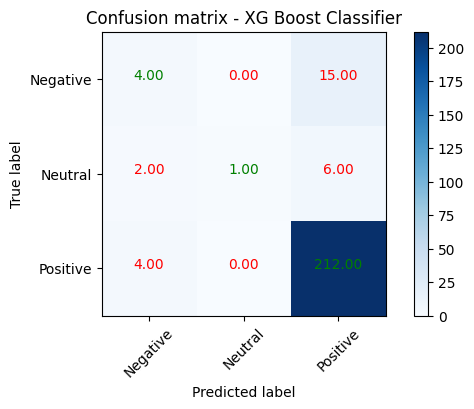

Cat Boost Classifier (TFIDF) - Accuracy: 0.8770491803278688
Cat Boost Classifier (TFIDF) - Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.16      0.21        19
           1       0.00      0.00      0.00         9
           2       0.91      0.98      0.94       216

    accuracy                           0.88       244
   macro avg       0.40      0.38      0.38       244
weighted avg       0.83      0.88      0.85       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

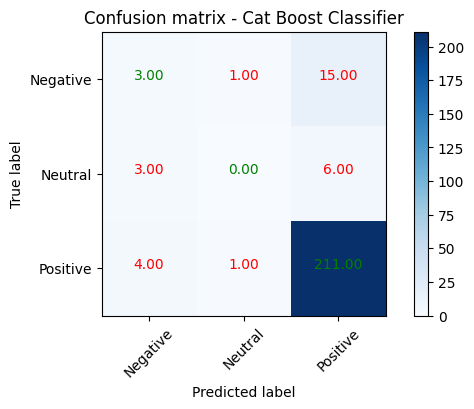

In [39]:
# List of models to evaluate
models = [('Logistic Regression', lr_tfidf), ('Multinomial Naive Bayes', nb_tfidf),
          ('Decision Tree Classifier', dtc_tfidf), ('Support Vector Classifier', svc_tfidf), 
          ('Linear SVC', lin_svc_tfidf),('Random Forest Classifier', rf_tfidf), 
          ('XG Boost Classifier' , xgb_tfidf), ('Cat Boost Classifier' , cat_tfidf)]

# Iterate through each model and evaluate its performance
for model_name, model in models:
    # Make predictions
    y_pred = model.predict(tfidf_test)
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model_name, "(TFIDF) - Accuracy:", accuracy)
    print(model_name, "(TFIDF) - Classification Report:\n", report)
    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'],
                          title='Confusion matrix - ' + model_name)
    plt.show()

## Summary Table

In [40]:
# Define the models
models = {
    'Logistic Regression': lr_tfidf,
    'Multinomial Naive Bayes': nb_tfidf,
    'Decision Tree Classifier': dtc_tfidf,
    'Suport Vector Classifier' : svc_tfidf,
    'Linear SVC': lin_svc_tfidf,
    'Random Forest Classifier' : rf_tfidf,
    'XG Boost Classifier' : xgb_tfidf,
    'Cat Boost Classifier' : cat_tfidf  
}

# Create a DataFrame to store the evaluation metrics
results_tfidf = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and store the results in the DataFrame
for model_name, model in models.items():
    y_pred = model.predict(tfidf_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_tfidf.loc[model_name] = [accuracy, precision, recall, f1]

# Display the results

print("Summary Table : SMOTE with TF-IDF")
display(results_tfidf)

Summary Table : SMOTE with TF-IDF


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.881148,0.859321,0.881148,0.867745
Multinomial Naive Bayes,0.831967,0.842372,0.831967,0.837056
Decision Tree Classifier,0.774590,0.832446,0.774590,0.800946
Suport Vector Classifier,0.885246,0.783660,0.885246,0.831361
Linear SVC,0.881148,0.836263,0.881148,0.855351
Random Forest Classifier,0.889344,0.839368,0.889344,0.852182
XG Boost Classifier,0.889344,0.873493,0.889344,0.864814
Cat Boost Classifier,0.877049,0.828477,0.877049,0.849981


## Overall Summary

In [41]:
print("Summary Table : SMOTE with BOW")
display(results_bow)

print("Summary Table : SMOTE with TF-IDF")
display(results_tfidf)

Summary Table : SMOTE with BOW


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.881148,0.872385,0.881148,0.875881
Multinomial Naive Bayes,0.885246,0.834912,0.885246,0.848091
Decision Tree Classifier,0.762295,0.831223,0.762295,0.793287
Support Vector Classifier,0.852459,0.855145,0.852459,0.853525
Linear SVC,0.872951,0.873543,0.872951,0.873190
Random Forest Classifier,0.897541,0.870735,0.897541,0.878874
XG Boost Classifier,0.901639,0.891692,0.901639,0.876318
Cat Boost,0.864754,0.849765,0.864754,0.855448


Summary Table : SMOTE with TF-IDF


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.881148,0.859321,0.881148,0.867745
Multinomial Naive Bayes,0.831967,0.842372,0.831967,0.837056
Decision Tree Classifier,0.774590,0.832446,0.774590,0.800946
Suport Vector Classifier,0.885246,0.783660,0.885246,0.831361
Linear SVC,0.881148,0.836263,0.881148,0.855351
Random Forest Classifier,0.889344,0.839368,0.889344,0.852182
XG Boost Classifier,0.889344,0.873493,0.889344,0.864814
Cat Boost Classifier,0.877049,0.828477,0.877049,0.849981


## Selecting best model based on Highest F1-score

In [42]:
summary_results = {'SMOTE with BOW': results_bow, 'SMOTE with TF-IDF': results_tfidf}

for summary, results in summary_results.items():
    print(f"Top 3 best performing models for {summary}:")
    results_sorted = results.sort_values(by=['F1-Score'], ascending=False).head(4)
    for i, (model_name, row) in enumerate(results_sorted.iterrows(), start=1):
        acc_score = row['Accuracy']
        precision_val = row['Precision']
        recall_val = row['Recall']
        f1 = row['F1-Score']
        print(f"{i}. {model_name} - Accuracy: {acc_score:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1-Score: {f1:.4f}")
    print()

Top 3 best performing models for SMOTE with BOW:
1. Random Forest Classifier - Accuracy: 0.8975, Precision: 0.8707, Recall: 0.8975, F1-Score: 0.8789
2. XG Boost Classifier - Accuracy: 0.9016, Precision: 0.8917, Recall: 0.9016, F1-Score: 0.8763
3. Logistic Regression - Accuracy: 0.8811, Precision: 0.8724, Recall: 0.8811, F1-Score: 0.8759
4. Linear SVC - Accuracy: 0.8730, Precision: 0.8735, Recall: 0.8730, F1-Score: 0.8732

Top 3 best performing models for SMOTE with TF-IDF:
1. Logistic Regression - Accuracy: 0.8811, Precision: 0.8593, Recall: 0.8811, F1-Score: 0.8677
2. XG Boost Classifier - Accuracy: 0.8893, Precision: 0.8735, Recall: 0.8893, F1-Score: 0.8648
3. Linear SVC - Accuracy: 0.8811, Precision: 0.8363, Recall: 0.8811, F1-Score: 0.8554
4. Random Forest Classifier - Accuracy: 0.8893, Precision: 0.8394, Recall: 0.8893, F1-Score: 0.8522



### Note :-

- Based on the F1-Score metric, the XG Boost Classifier performs the best in both the BOW and TF-IDF representations. It achieves an F1-Score of 0.876 with BOW and 0.865 with TF-IDF. 
- The Random Forest Classifier also performs well in both representations, with an F1-Score of 0.879 with BOW and 0.852 with TF-IDF.

# Hyperparameter Tuning:-

## Grid Search CV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

## Hyperparameter tuning for XG Boost : BOW

In [44]:
# Define the hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
}

# Create an instance of the XG Boost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, scoring='accuracy', cv=3, verbose=3)
grid_search_xgb.fit(X_train_cv_balanced, y_train_cv_balanced)

# Get the best hyperparameters and model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.875 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.988 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.984 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.875 total time=   2.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.990 total time=   2.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.986 total time=   2.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.875 total time=   3.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.988 total time=   3.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.986 total time=   3.6s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.877 total ti

## Hyperparameter tuning for Logistic Regression : BOW

In [46]:
# Define the hyperparameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

# Create an instance of the Logistic Regression model
lr_classifier = LogisticRegression(random_state=42)

# Perform grid search
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, scoring='accuracy', cv=3, verbose=3)
grid_search_lr.fit(X_train_cv_balanced, y_train_cv_balanced)

# Get the best hyperparameters and model
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.913 total time=   0.2s
[CV 2/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.920 total time=   0.2s
[CV 3/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.928 total time=   0.1s
[CV 1/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, max_iter=200, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/3] END ...C=0.1, max_iter=200, penalty=l2;, score=0.920 total time=   0.1s
[CV 3/3] END ...C=0.1, max_iter=200, penalty=l2;

## Linear SVC - Hyperparameter Tuning

In [47]:
# Hyperparameter tuning for Support Vector Classifier (SVC) with linear kernel
param_grid_svc = {
    'C': [0.1, 1, 10],
}

# Create an instance of the SVC model
svc_classifier = SVC(kernel='linear', random_state=42, probability=True)

# Perform grid search
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, scoring='accuracy', cv=3, verbose=3)
grid_search_svc.fit(X_train_cv_balanced, y_train_cv_balanced)

# Get the best hyperparameters and model
best_params_svc = grid_search_svc.best_params_
best_model_svc = grid_search_svc.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.901 total time=   1.0s
[CV 2/3] END .............................C=0.1;, score=0.903 total time=   0.9s
[CV 3/3] END .............................C=0.1;, score=0.924 total time=   1.0s
[CV 1/3] END ...............................C=1;, score=0.905 total time=   0.8s
[CV 2/3] END ...............................C=1;, score=0.905 total time=   0.8s
[CV 3/3] END ...............................C=1;, score=0.920 total time=   0.7s
[CV 1/3] END ..............................C=10;, score=0.903 total time=   0.7s
[CV 2/3] END ..............................C=10;, score=0.901 total time=   0.7s
[CV 3/3] END ..............................C=10;, score=0.928 total time=   0.8s


In [48]:
print('Logistic Regression Parameters',best_params_lr)
print('XG Boost Parameters',best_params_xgb)
print('Linear SVC Parameters',best_params_svc)

Logistic Regression Parameters {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
XG Boost Parameters {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Linear SVC Parameters {'C': 10}


In [49]:
print('Logistic Regression Model',best_model_lr)
print('XG Boost Model',best_model_xgb)
print('Linear SVC Model',best_model_svc)

Logistic Regression Model LogisticRegression(C=1, random_state=42)
XG Boost Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Linear SVC Model SVC(C=10, kernel='linear', probability=True, random_state=42)


## Ensemble Model : Best Hypertuned Parameters(BOW)

In [50]:
# Create the individual models with best hyperparameters
logistic_regression = LogisticRegression(penalty='l2', C=1, max_iter=100, random_state=42)
xgboost = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300, random_state=42)
svc = SVC(C=10, kernel='linear', probability=True, random_state=42)

# Create an ensemble voting classifier
BOW_voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('xgboost', xgboost),
    ('svc', svc)
], voting='soft')

# Fit the ensemble classifier on the training data
BOW_voting_classifier.fit(X_train_cv_balanced, y_train_cv_balanced)

# Predict using the ensemble classifier
y_pred_ensemble = BOW_voting_classifier.predict(count_test)

Ensemble Classifier Metrics:
Accuracy: 0.8934426229508197
Classification Report Ensemble Classifier - BOW :
               precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.43      0.33      0.38         9
           2       0.92      0.97      0.95       216

    accuracy                           0.89       244
   macro avg       0.63      0.54      0.57       244
weighted avg       0.88      0.89      0.88       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

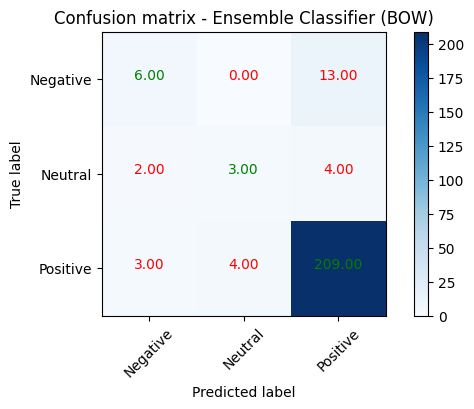

In [51]:
# Evaluate the ensemble classifier

print("Ensemble Classifier Metrics:")
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy:", accuracy_ensemble)

classification_report_ensemble = classification_report(y_test, y_pred_ensemble)
print("Classification Report Ensemble Classifier - BOW :\n", classification_report_ensemble)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure()
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'], title='Confusion matrix - Ensemble Classifier (BOW)')

Receiver Operating Characteristic - Ensemble Classifier (BOW)
ROC AUC Scores Ensemble Classifier (BOW): [0.82011696 0.87706856 0.86458333]
Macro-average ROC AUC Ensemble Classifier (BOW): 0.8539229501057607
Micro-average ROC AUC Ensemble Classifier (BOW): 0.9699509540446115


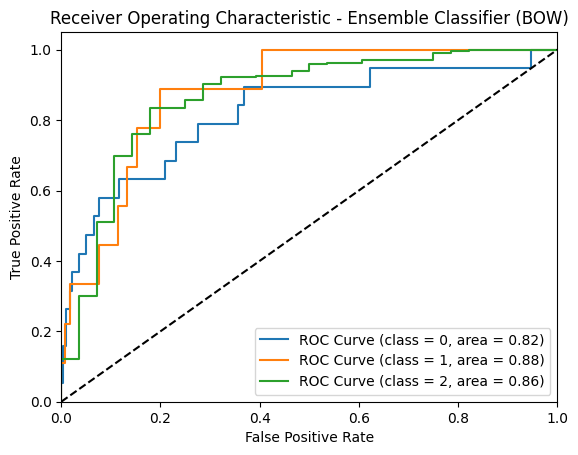

In [52]:
# Calculate probabilities for ROC curve
y_prob = BOW_voting_classifier.predict_proba(count_test)

# Calculate ROC AUC score for each class
print('Receiver Operating Characteristic - Ensemble Classifier (BOW)')
roc_auc_scores = roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)
print("ROC AUC Scores Ensemble Classifier (BOW):", roc_auc_scores)

# Calculate macro-average ROC AUC score
roc_auc_macro = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print("Macro-average ROC AUC Ensemble Classifier (BOW):", roc_auc_macro)

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(y_test, y_prob, multi_class='ovr', average='micro')
print("Micro-average ROC AUC Ensemble Classifier (BOW):", roc_auc_micro)

# Calculate false positive rate, true positive rate, and thresholds for ROC curve for each class
fprs = {}
tprs = {}
thresholds = {}
for i in range(len(roc_auc_scores)):
    fprs[i], tprs[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

# Plot ROC curves for each class
plt.figure()
for i in range(len(roc_auc_scores)):
    plt.plot(fprs[i], tprs[i], label='ROC Curve (class = %d, area = %0.2f)' % (i, roc_auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ensemble Classifier (BOW)')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter tuning for XG Boost : TFIDF

In [53]:
# Define the hyperparameter grid
param_grid_xgb_tfidf = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
}

# Create an instance of the XG Boost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform grid search for XG Boost with TF-IDF features
grid_search_xgb_tfidf = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb_tfidf, scoring='accuracy', cv=3, verbose=3)
grid_search_xgb_tfidf.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Get the best hyperparameters and model
best_params_tfidf_xgb = grid_search_xgb_tfidf.best_params_
best_model_tfidf_xgb = grid_search_xgb_tfidf.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.960 total time=   1.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.974 total time=   2.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.986 total time=   2.9s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.958 total time=   4.7s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.976 total time=   5.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.986 total time=   4.8s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.950 total time=   6.7s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.978 total time=   7.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.984 total time=   7.2s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.962 total ti

## Hyperparameter tuning for Logistic Regression : TFIDF

In [54]:
# Define the hyperparameter grid
param_grid_lr_tfidf = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

# Create an instance of the Logistic Regression model
lr_classifier = LogisticRegression(random_state=42)

# Perform grid search
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr_tfidf, scoring='accuracy', cv=3, verbose=3)
grid_search_lr.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Get the best hyperparameters and model
best_params_tfidf_lr = grid_search_lr.best_params_
best_model_tfidf_lr = grid_search_lr.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.905 total time=   0.0s
[CV 3/3] END ...C=0.1, max_iter=100, penalty=l2;, score=0.930 total time=   0.0s
[CV 1/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .....C=0.1, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, max_iter=200, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/3] END ...C=0.1, max_iter=200, penalty=l2;, score=0.905 total time=   0.0s
[CV 3/3] END ...C=0.1, max_iter=200, penalty=l2;

## Hyperparameter tuning for Linear SVC : TFIDF

In [55]:
# Hyperparameter tuning for Support Vector Classifier (SVC) with linear kernel
param_grid_svc_tfidf = {
    'C': [0.1, 1, 10],
}

# Create an instance of the SVC model
svc_classifier = SVC(kernel='linear', random_state=42, probability=True)

# Perform grid search
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc_tfidf, scoring='accuracy', cv=3, verbose=3)
grid_search_svc.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Get the best hyperparameters and model
best_params_tfidf_svc = grid_search_svc.best_params_
best_model_tfidf_svc = grid_search_svc.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.905 total time=   4.7s
[CV 2/3] END .............................C=0.1;, score=0.905 total time=   4.6s
[CV 3/3] END .............................C=0.1;, score=0.901 total time=   4.8s
[CV 1/3] END ...............................C=1;, score=0.988 total time=   2.0s
[CV 2/3] END ...............................C=1;, score=0.974 total time=   2.0s
[CV 3/3] END ...............................C=1;, score=0.978 total time=   2.0s
[CV 1/3] END ..............................C=10;, score=0.986 total time=   1.5s
[CV 2/3] END ..............................C=10;, score=0.980 total time=   1.3s
[CV 3/3] END ..............................C=10;, score=0.978 total time=   1.3s


In [56]:
print('Logistic Regression Parameters',best_params_tfidf_lr)
print('XG Boost Parameters',best_params_tfidf_xgb)
print('Linear SVC Parameters',best_params_tfidf_svc)

Logistic Regression Parameters {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
XG Boost Parameters {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Linear SVC Parameters {'C': 10}


In [57]:
print('Logistic Regression Model',best_model_tfidf_lr)
print('XG Boost Model',best_model_tfidf_xgb)
print('Linear SVC Model',best_model_tfidf_svc)

Logistic Regression Model LogisticRegression(C=10, random_state=42)
XG Boost Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Linear SVC Model SVC(C=10, kernel='linear', probability=True, random_state=42)


## Ensemble Model : Best Hypertuned Parameters(TFIDF)

In [58]:
# Create the individual models with best hyperparameters
logistic_regression = LogisticRegression(penalty='l2', C=10, max_iter=100, random_state=42)
xgboost = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
svc = SVC(C=10, kernel='linear', probability=True, random_state=42)

# Create an ensemble voting classifier
TFIDF_voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('xgboost', xgboost),
    ('svc', svc)
], voting='soft')

# Fit the ensemble classifier on the training data
TFIDF_voting_classifier.fit(X_train_tfidf_balanced, y_train_tfidf_balanced)

# Predict using the ensemble classifier
y_pred_ensemble_tfidf = TFIDF_voting_classifier.predict(tfidf_test)

Ensemble Classifier Metrics:
Accuracy: 0.8811475409836066
Classification Report Ensemble Classifier - TFIDF :
               precision    recall  f1-score   support

           0       0.40      0.11      0.17        19
           1       0.00      0.00      0.00         9
           2       0.90      0.99      0.94       216

    accuracy                           0.88       244
   macro avg       0.43      0.36      0.37       244
weighted avg       0.83      0.88      0.85       244

Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

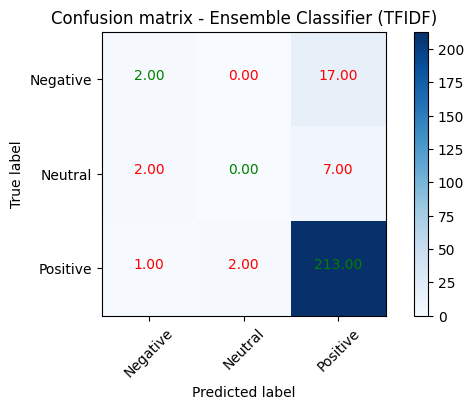

In [59]:
# Evaluate the ensemble classifier

print("Ensemble Classifier Metrics:")
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble_tfidf)
print("Accuracy:", accuracy_ensemble)

classification_report_ensemble = classification_report(y_test, y_pred_ensemble_tfidf)
print("Classification Report Ensemble Classifier - TFIDF :\n", classification_report_ensemble)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble_tfidf)
plt.figure()
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'], title='Confusion matrix - Ensemble Classifier (TFIDF)')

Receiver Operating Characteristic - Ensemble Classifier (TFIDF)
ROC AUC Scores Ensemble Classifier (TFIDF): [0.78619883 0.83120567 0.8411045 ]
Macro-average ROC AUC Ensemble Classifier (TFIDF): 0.8195030005075731
Micro-average ROC AUC Ensemble Classifier (TFIDF): 0.9648531980650363


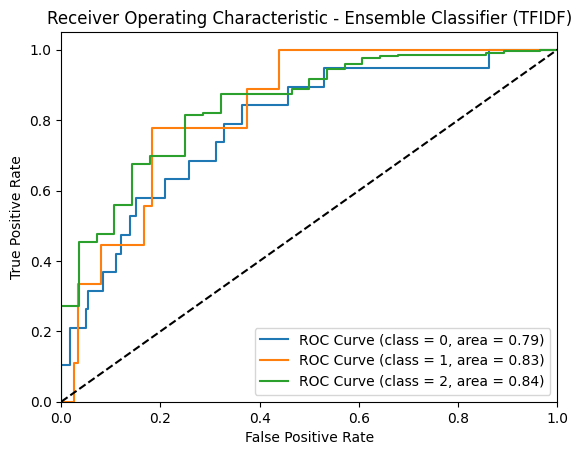

In [60]:
# Calculate probabilities for ROC curve
y_prob = TFIDF_voting_classifier.predict_proba(tfidf_test)

# Calculate ROC AUC score for each class
print('Receiver Operating Characteristic - Ensemble Classifier (TFIDF)')
roc_auc_scores = roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)
print("ROC AUC Scores Ensemble Classifier (TFIDF):", roc_auc_scores)

# Calculate macro-average ROC AUC score
roc_auc_macro = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print("Macro-average ROC AUC Ensemble Classifier (TFIDF):", roc_auc_macro)

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(y_test, y_prob, multi_class='ovr', average='micro')
print("Micro-average ROC AUC Ensemble Classifier (TFIDF):", roc_auc_micro)

# Calculate false positive rate, true positive rate, and thresholds for ROC curve for each class
fprs = {}
tprs = {}
thresholds = {}
for i in range(len(roc_auc_scores)):
    fprs[i], tprs[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

# Plot ROC curves for each class
plt.figure()
for i in range(len(roc_auc_scores)):
    plt.plot(fprs[i], tprs[i], label='ROC Curve (class = %d, area = %0.2f)' % (i, roc_auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ensemble Classifier (TFIDF)')
plt.legend(loc='lower right')
plt.show()

## Test

In [61]:
# Preprocess the test example (replace 'test_example' with the actual test example)
new_data = ["Good evening. Thank you for choosing my name is how can I delight you today? Uh my card That's easy, it's okay I want to cancel my card. Can I know the reason why you want to close the card? I don't want to continue with uh my card. You have 3,001 60 for reward points in your card. Yeah so please use it and after that you can call it for the cancellation of the guard. Uh Is there any way to use the points right now? Yes sir you can redeem these points onto our reward portal. That is triple W dot reward dot com. What's available? Alright uh Thank you 1000 1 64 Yeah yeah I'm sending you a link on your registered mobile number. Okay there's nothing there on okay you said that you already checked? Yes that is possible this is a super guard Do you know the features and benefits of this card? Yes, yes sir yeah I know the features. I want to cancel the card there is the only reason that you don't use it anymore. Yeah. Mhm. Okay sir for card cancellation, can you please confirm your mother's name? This is thank you. Okay and your card and birth name? Fine, the name on your card go ahead. Okay please be online, let me uh raise the request Okay for cancellation. Okay sir sure. Yeah this is not can you please call back us again in uh one to do us because right now the system is not getting any information I'm really sorry for the inconvenience, is it possible for you to call me back? Is it possible for you to call me back on the phone number? No, sir, please call back at the beginning, Maximum? Uh, half an hour. Okay. The number Okay. To directly press triple two at nine and then you directly connected to us? Okay. Let me just hold on uh, how to connect. Okay then. Okay. Yes. Yes, sir. Yes, sir. Okay. Okay. Sorry for inconvenience. Thank you. Uh for more information. You can visit our bank dot com. Thank you for choosing our bank. Have a good day. That's okay. Thank you. Um just"]

In [62]:
# Preprocess the new data
cleaned_new_data = data_cleaner(new_data)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 323.58it/s]


In [63]:
# Transform the preprocessed data using the trained TF-IDF vectorizer
bow_vectors_new_data = count_vectorizer.transform(cleaned_new_data)

# Make predictions on the new data using the ensemble model
predictions_new_data = BOW_voting_classifier.predict(bow_vectors_new_data)

# Interpret the predictions
sentiments = le.inverse_transform(predictions_new_data)
for text, sentiment in zip(new_data, sentiments):
    print("Text:", text)
    print("Clean Text:", cleaned_new_data)
    print("Predicted Sentiment:", sentiment)
    print()

Text: Good evening. Thank you for choosing my name is how can I delight you today? Uh my card That's easy, it's okay I want to cancel my card. Can I know the reason why you want to close the card? I don't want to continue with uh my card. You have 3,001 60 for reward points in your card. Yeah so please use it and after that you can call it for the cancellation of the guard. Uh Is there any way to use the points right now? Yes sir you can redeem these points onto our reward portal. That is triple W dot reward dot com. What's available? Alright uh Thank you 1000 1 64 Yeah yeah I'm sending you a link on your registered mobile number. Okay there's nothing there on okay you said that you already checked? Yes that is possible this is a super guard Do you know the features and benefits of this card? Yes, yes sir yeah I know the features. I want to cancel the card there is the only reason that you don't use it anymore. Yeah. Mhm. Okay sir for card cancellation, can you please confirm your moth

# Model Deployment 

### Model Save

- This file contains the serialized model object and can be used to load the model in the future for making predictions on new data

In [64]:
import joblib

In [65]:
# Save the TF-IDF vectorizer
joblib.dump(count_vectorizer, 'count_vectorizer.joblib')

['count_vectorizer.joblib']

In [66]:
# save the model to a file
joblib.dump(BOW_voting_classifier, 'BOW_Ensemble_voting_classifier.joblib')

['BOW_Ensemble_voting_classifier.joblib']